In [2]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from symmetric_sne import SymmetricSNE
from data_loader import load_data
from utils import plot_2d_visualization

np.random.seed(0)

In [14]:

from matplotlib.lines import Line2D
from matplotlib.colors import Normalize

def plot_sym_and_tsne(X_tsne, X_sym_sne, y, title, legend=True, show=True, save=False):
    """
    Plot 2D visualization of the representations. Assumes there are six representations.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
    ax[0].scatter(X_sym_sne[:, 0], X_sym_sne[:, 1], c=y, cmap=plt.cm.gist_rainbow, s=10)
    ax[0].set_title('Symmetric SNE')

    ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.gist_rainbow, s=10)
    ax[1].set_title('t-SNE')


    if legend:
        norm = Normalize(vmin=0, vmax=9)
        legend_handles = [Line2D([0], [0], marker='o', color='w', label=str(i),
                                markerfacecolor=plt.cm.gist_rainbow(norm(i)), markersize=5) for i in range(10)]
        ax[1].legend(handles=legend_handles,  bbox_to_anchor=(1.05, 1), loc='upper right')
            
    # plt.clim(-0.5, 9.5)
    # plt.axis('off')
    plt.tight_layout()
    if save:
        plt.savefig(f"out/figures/{title}.png", dpi=400)
    if show:
        plt.show()

## MNIST

In [3]:
classes = [i for i in range(10)]
X_mnist_subset, y_minst_subset = load_data('mnist', save_if_not_found=True, classes=classes, samples_per_class=600)
X_mnist_subset.shape

(6000, 784)

In [8]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_mnist_subset)
print('tsne done.')
sym_sne = SymmetricSNE(perplexity=40)
X_sym_sne = sym_sne.fit_transform(X_mnist_subset, P_file='data/p_joint/mnist_6k.pkl')

map_points = {'tsne': X_tsne, 'sym_sne': X_sym_sne}
with open('out/map_points/mnist_6k.pkl', 'wb') as f:
    pickle.dump(map_points, f, pickle.HIGHEST_PROTOCOL)


tsne done.


100%|██████████| 500/500 [19:35<00:00,  2.35s/it]


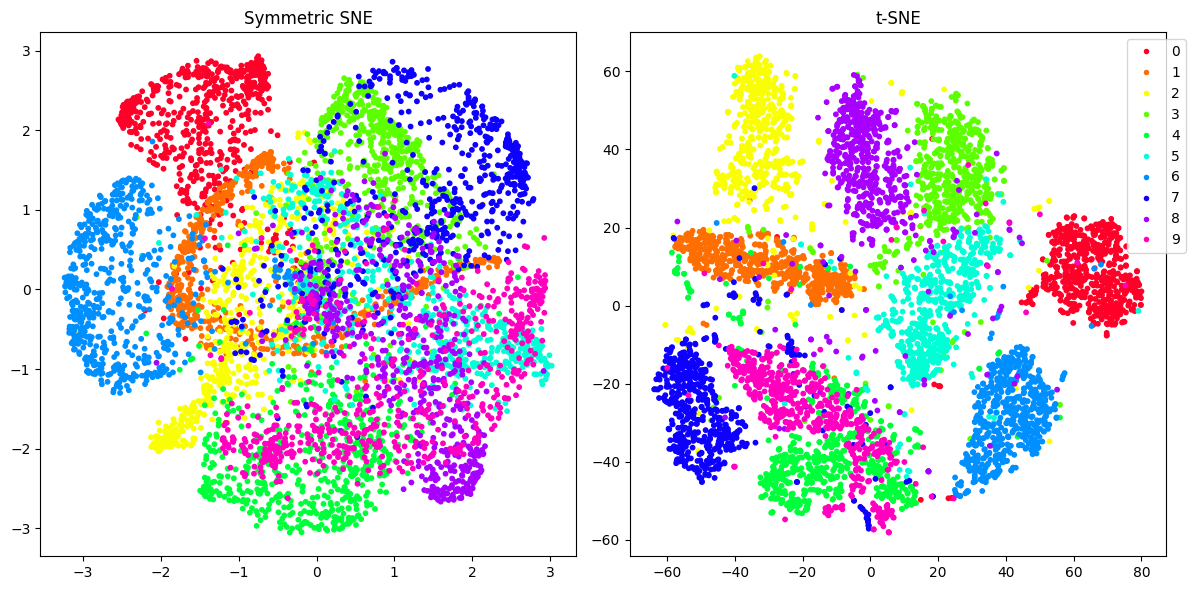

In [16]:
# To plot: for each data set, plot the difference 
with open('out/map_points/mnist_6k.pkl', 'rb') as f:
    data = pickle.load(f)
X_mnist_tsne = data['tsne']
X_mnist_sym_sne = data['sym_sne']

plot_sym_and_tsne(X_mnist_tsne, X_mnist_sym_sne, y_minst_subset, title='mnist_crowding', save=False)

## Olivetti Faces

In [17]:
X_orl, y_orl = load_data('orl', save_if_not_found=True)
X_orl = X_orl.reshape(X_orl.shape[0], -1)
pca_orl = PCA(n_components=30)
X_orl_pca = pca_orl.fit_transform(X_orl)

In [18]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_orl_pca)
print('tsne done.')
sym_sne = SymmetricSNE(perplexity=40)
X_sym_sne = sym_sne.fit_transform(X_orl_pca, P_file='data/p_joint/orl_pca30.pkl')

map_points = {'tsne': X_tsne, 'sym_sne': X_sym_sne}
with open('out/map_points/orl_pca30.pkl', 'wb') as f:
    pickle.dump(map_points, f, pickle.HIGHEST_PROTOCOL)

tsne done.


100%|██████████| 500/500 [00:10<00:00, 46.95it/s]


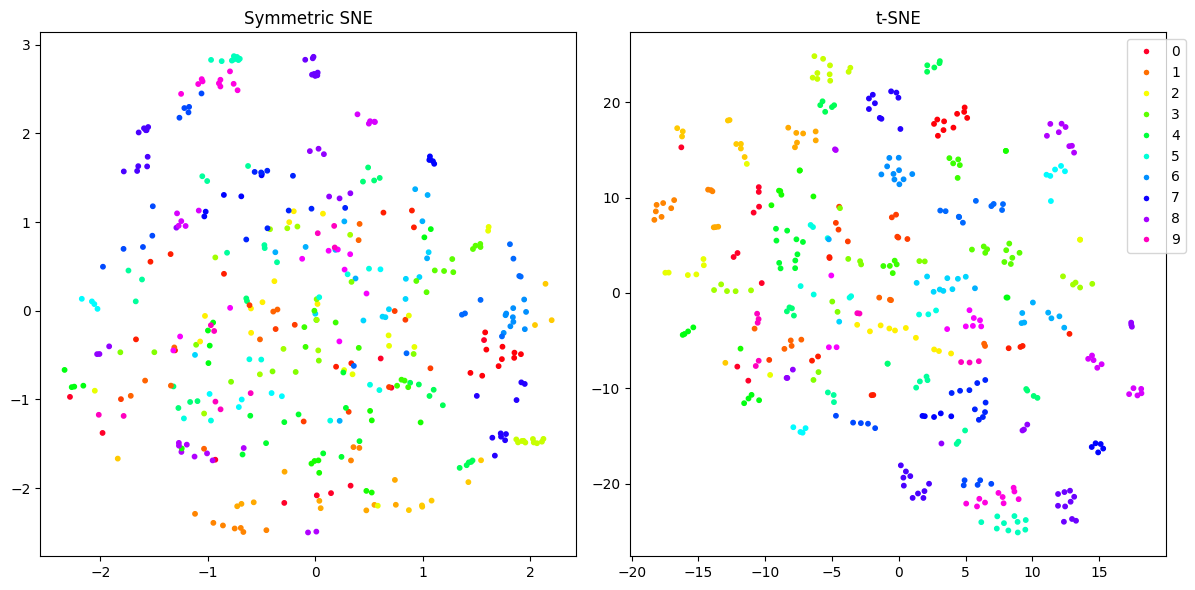

In [27]:
# To plot: for each data set, plot the difference 
with open('out/map_points/orl_pca30.pkl', 'rb') as f:
    data = pickle.load(f)
X_orl_tsne = data['tsne']
X_orl_sym_sne = data['sym_sne']

plot_sym_and_tsne(X_orl_tsne, X_orl_sym_sne, y_orl, title='orl_crowding', save=True)

## COIL-20

In [21]:
X_coil, y_coil = load_data('coil20', save_if_not_found=True)
X_coil = X_coil.reshape(X_coil.shape[0], -1)
pca_coil = PCA(n_components=30)

X_coil_pca = pca_coil.fit_transform(X_coil)

In [22]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_coil_pca)
print('tsne done.')
sym_sne = SymmetricSNE(perplexity=40)
X_sym_sne = sym_sne.fit_transform(X_coil_pca, P_file='data/p_joint/coil_pca30.pkl')

map_points = {'tsne': X_tsne, 'sym_sne': X_sym_sne}
with open('out/map_points/coil_pca30.pkl', 'wb') as f:
    pickle.dump(map_points, f, pickle.HIGHEST_PROTOCOL)

tsne done.


100%|██████████| 500/500 [01:40<00:00,  4.96it/s]


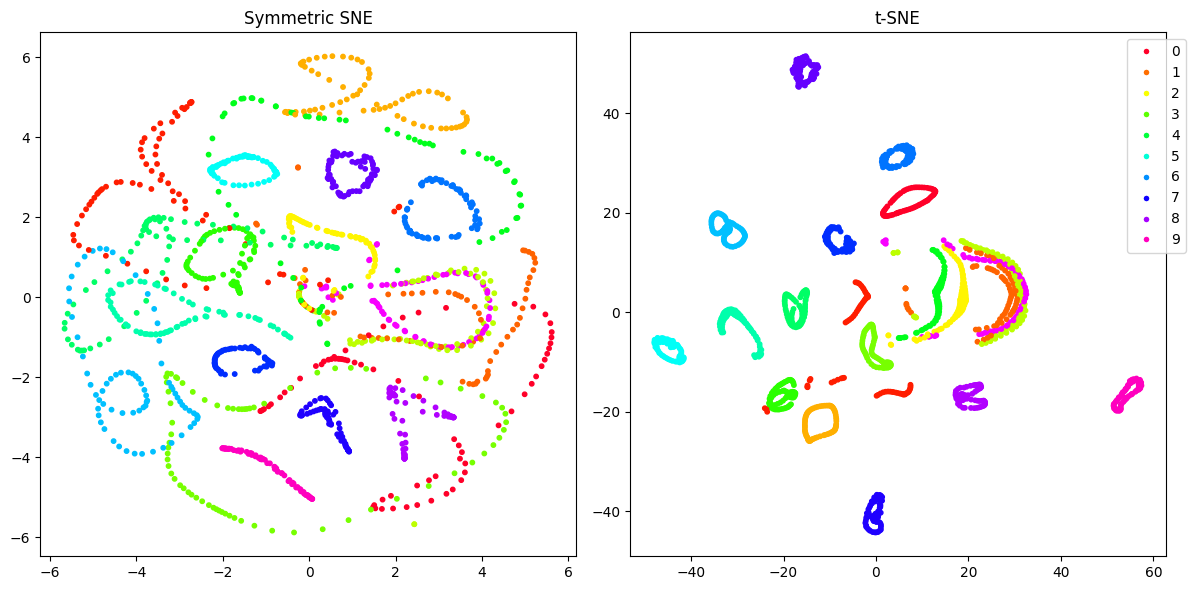

In [25]:
# To plot: for each data set, plot the difference 
with open('out/map_points/coil_pca30.pkl', 'rb') as f:
    data = pickle.load(f)
X_coil_tsne = data['tsne']
X_coil_sym_sne = data['sym_sne']

plot_sym_and_tsne(X_coil_tsne, X_coil_sym_sne, y_coil, title='coil_crowding', save=True)